<a href="https://colab.research.google.com/github/akgulhandan/MscThesis/blob/main/MachineLearningAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:red; font-size:30px">Deep Learning Architecture Model With Tabular Data</h1>

<h2>Convolutional Neural Networks (CNN)</h2>
<p>The main part of the CNN model will be:</p>

1. Convolutional layer -Feature extraction
2. Pooling layer -Reduce the dimensions
3. Fully connected layer -Predictions

In [ ]:
# Loading the dependencies
import os# This package helps to set your current folder location
import pandas as pd# Data manipulation
pd.set_option("display.max_rows",None)# Expanding rows output
pd.set_option("display.max_columns",None)# Expanding columns output
import numpy as np
np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")# Filter warnings
from scipy import stats
import seaborn as sns# Visualizations
import matplotlib.pyplot as plt
import tensorflow as tf# Deep learning models
from sklearn.metrics import mean_squared_error# Assessing the regression models
from sklearn.preprocessing import StandardScaler# Standardizing the data
from sklearn.model_selection import train_test_split# Splitting the data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Flatten, Dense, LSTM,SimpleRNN

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

#### Data Description

In [ ]:
Description=pd.read_excel("METADATA.xlsx")# Data description to gain understanding
display(Description.transpose())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
ABBREVIATION,x_coord,y_coord,month,year,groundfrost,hurs,psl,pv,rainfall,sfcWind,snowLying,sun,tas,NaN,NaN,Remarks,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 suffices...",NaN,NaN,Licence,Data used under the Open Government Licence v3,NaN,Reference,"Met Office; Hollis, D.; McCarthy, M.; Kendon, ...",HadUK-Grid Gridded Climate Observations on a 5...,NERC EDS Centre for Environmental Data Analysi...
NAME,Projection x coordinate ID,Projection y coordinate ID,Month,Year,Days of ground frost,Relative humidity,Sea level pressure,Vapour pressure,Total rainfall,Wind speed,Days of snow lying,Sunshine,Air temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DESCRIPTION,Refers to projection x coordinate,Refers to projection y coordinate,Month counting from Jan,Year,Number of days with surface temperature below ...,Relative humidity at 1.5m,Air pressure at mean sea level,Partial pressure of water vapour in the air,Amount thickness of precipitation (liquid wate...,Wind speed at 10m,Number of days with snow lying at 0900,Duration of sunshine,Mean air temperature at 1.5m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UNIT,categorical,categorical,ordinal,numeric,days,%,hPa,hPa,mm,m/s,days,hours,°C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCALE RESOLUTION,NaN,NaN,1.0,1.0,1.0,0.01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FREQUENCY,NaN,NaN,NaN,NaN,monthly,monthly,monthly,monthly,monthly,monthly,monthly,monthly,monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGGREGATION OVER TIME,NaN,NaN,NaN,NaN,"inimum within days time, sum over days",mean,mean,mean,sum,mean,sum (interval: 1 day),sum,"mid-range within days time, mean over days",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOURCE,NaN,NaN,NaN,NaN,HadUK-Grid_v1.2.0.0 (Gridded surface climate o...,HadUK-Grid_v1.2.0.0 (Gridded surface climate o...,HadUK-Grid_v1.2.0.0 (Gridded surface climate o...,HadUK-Grid_v1.2.0.0 (Gridded surface climate o...,HadUK-Grid_v1.2.0.0 (Gridded surface climate o...,HadUK-Grid_v1.2.0.0 (Gridded surface climate o...,HadUK-Grid_v1.2.0.0 (Gridded surface climate o...,HadUK-Grid_v1.2.0.0 (Gridded surface climate o...,HadUK-Grid_v1.2.0.0 (Gridded surface climate o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Importing the tabular data</h3>

In [ ]:
data=pd.read_csv("Met dataset - 2015-to-2022_12months.csv")# Importing the data
display(data.head());display(data.info());display(data.describe())

,x_coord,y_coord,year,groundfrost_1,groundfrost_2,groundfrost_3,groundfrost_4,groundfrost_5,groundfrost_6,groundfrost_7,groundfrost_8,groundfrost_9,groundfrost_10,groundfrost_11,groundfrost_12,hurs_1,hurs_2,hurs_3,hurs_4,hurs_5,hurs_6,hurs_7,hurs_8,hurs_9,hurs_10,hurs_11,hurs_12,psl_1,psl_2,psl_3,psl_4,psl_5,psl_6,psl_7,psl_8,psl_9,psl_10,psl_11,psl_12,sun_1,sun_2,sun_3,sun_4,sun_5,sun_6,sun_7,sun_8,sun_9,sun_10,sun_11,sun_12,pv_1,pv_2,pv_3,pv_4,pv_5,pv_6,pv_7,pv_8,pv_9,pv_10,pv_11,pv_12,sfcWind_1,sfcWind_2,sfcWind_3,sfcWind_4,sfcWind_5,sfcWind_6,sfcWind_7,sfcWind_8,sfcWind_9,sfcWind_10,sfcWind_11,sfcWind_12,tas_1,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,tas_8,tas_9,tas_10,tas_11,tas_12,snowLying_1,snowLying_2,snowLying_3,snowLying_4,snowLying_5,snowLying_6,snowLying_7,snowLying_8,snowLying_9,snowLying_10,snowLying_11,snowLying_12,rainfall_1,rainfall_2,rainfall_3,rainfall_4,rainfall_5,rainfall_6,rainfall_7,rainfall_8,rainfall_9,rainfall_10,rainfall_11,rainfall_12
0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33235 entries, 0 to 33234
Columns: 111 entries, x_coord to rainfall_12
dtypes: float64(108), int64(3)
memory usage: 28.1 MB


None

,x_coord,y_coord,year,groundfrost_1,groundfrost_2,groundfrost_3,groundfrost_4,groundfrost_5,groundfrost_6,groundfrost_7,groundfrost_8,groundfrost_9,groundfrost_10,groundfrost_11,groundfrost_12,hurs_1,hurs_2,hurs_3,hurs_4,hurs_5,hurs_6,hurs_7,hurs_8,hurs_9,hurs_10,hurs_11,hurs_12,psl_1,psl_2,psl_3,psl_4,psl_5,psl_6,psl_7,psl_8,psl_9,psl_10,psl_11,psl_12,sun_1,sun_2,sun_3,sun_4,sun_5,sun_6,sun_7,sun_8,sun_9,sun_10,sun_11,sun_12,pv_1,pv_2,pv_3,pv_4,pv_5,pv_6,pv_7,pv_8,pv_9,pv_10,pv_11,pv_12,sfcWind_1,sfcWind_2,sfcWind_3,sfcWind_4,sfcWind_5,sfcWind_6,sfcWind_7,sfcWind_8,sfcWind_9,sfcWind_10,sfcWind_11,sfcWind_12,tas_1,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,tas_8,tas_9,tas_10,tas_11,tas_12,snowLying_1,snowLying_2,snowLying_3,snowLying_4,snowLying_5,snowLying_6,snowLying_7,snowLying_8,snowLying_9,snowLying_10,snowLying_11,snowLying_12,rainfall_1,rainfall_2,rainfall_3,rainfall_4,rainfall_5,rainfall_6,rainfall_7,rainfall_8,rainfall_9,rainfall_10,rainfall_11,rainfall_12
count,33235.000000,33235.000000,33235.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000
mean,12.000000,12.000000,4.047059,7.967022,7.896864,7.882327,7.836455,7.695970,7.654871,7.630654,7.630688,7.645554,7.650107,7.655114,7.810190,82.627248,82.598788,82.520225,82.471892,82.494478,82.475008,82.444610,82.396142,82.402726,82.433749,82.460072,82.481866,1013.775794,1013.784334,1013.866859,1013.843234,1013.792011,1013.815778,1013.832106,1013.890759,1013.898624,1013.822704,1013.658480,1013.644222,120.370605,120.551623,121.618347,122.179224,121.509594,121.777405,121.653630,122.232766,121.903138,121.336267,120.925937,121.099494,10.082034,10.090264,10.099644,10.110812,10.141701,10.172494,10.200219,10.213408,10.203500,10.209784,10.199985,10.166551,4.664804,4.672637,4.664893,4.650623,4.652764,4.641765,4.635736,4.626690,4.624441,4.638927,4.654713,4.634930,9.384803,9.407551,9.445206,9.475183,9.520862,9.571487,9.617047,9.644121,9.629163,9.625851,9.605303,9.543113,0.838160,0.790531,0.753087,0.741633,0.739536,0.738943,0.738943,0.739477,0.739477,0.739477,0.739477,0.789058,96.378303,96.340134,95.995318,95.486136,95.844339,95.301693,95.216766,94.560505,94.549497,95.647443,96.745711,96.063469
std,6.633349,6.633349,2.034474,6.876222,6.811918,6.797362,6.753774,6.754930,6.782279,6.803408,6.803571,6.789727,6.785715,6.784102,6.881720,5.237968,5.230427,5.235150,5.276444,5.259773,5.287395,5.358321,5.414399,5.403948,5.411805,5.437536,5.460762,5.267609,5.266516,5.325370,5.301377,5.260434,5.255060,5.270678,5.281953,5.276946,5.290753,5.403807,5.395496,64.476858,64.335560,64.350468,64.602215,63.997061,64.381927,64.318436,64.921807,64.845628,64.822413,65.126998,64.930750,2.668798,2.661024,2.651385,2.641303,2.633704,2.636899,2.659967,2.675450,2.663842,2.668589,2.667966,2.685978,1

In [ ]:
# Based on the data display its evodemt that there are misssing values present in the data
data.isna().sum()# The data consists of 26605 missing values that will all be droped

x_coord               0
y_coord               0
year                  0
groundfrost_1     26605
groundfrost_2     26605
groundfrost_3     26605
groundfrost_4     26605
groundfrost_5     26605
groundfrost_6     26605
groundfrost_7     26605
groundfrost_8     26605
groundfrost_9     26605
groundfrost_10    26605
groundfrost_11    26605
groundfrost_12    26605
hurs_1            26605
hurs_2            26605
hurs_3            26605
hurs_4            26605
hurs_5            26605
hurs_6            26605
hurs_7            26605
hurs_8            26605
hurs_9            26605
hurs_10           26605
hurs_11           26605
hurs_12           26605
psl_1             26605
psl_2             26605
psl_3             26605
psl_4             26605
psl_5             26605
psl_6             26605
psl_7             26605
psl_8             26605
psl_9             26605
psl_10            26605
psl_11            26605
psl_12            26605
sun_1             26605
sun_2             26605
sun_3           

In [ ]:
data=data.dropna()# Dropped all missing values
data.columns.to_list()# Checking the column names

['x_coord',
 'y_coord',
 'year',
 'groundfrost_1',
 'groundfrost_2',
 'groundfrost_3',
 'groundfrost_4',
 'groundfrost_5',
 'groundfrost_6',
 'groundfrost_7',
 'groundfrost_8',
 'groundfrost_9',
 'groundfrost_10',
 'groundfrost_11',
 'groundfrost_12',
 'hurs_1',
 'hurs_2',
 'hurs_3',
 'hurs_4',
 'hurs_5',
 'hurs_6',
 'hurs_7',
 'hurs_8',
 'hurs_9',
 'hurs_10',
 'hurs_11',
 'hurs_12',
 'psl_1',
 'psl_2',
 'psl_3',
 'psl_4',
 'psl_5',
 'psl_6',
 'psl_7',
 'psl_8',
 'psl_9',
 'psl_10',
 'psl_11',
 'psl_12',
 'sun_1',
 'sun_2',
 'sun_3',
 'sun_4',
 'sun_5',
 'sun_6',
 'sun_7',
 'sun_8',
 'sun_9',
 'sun_10',
 'sun_11',
 'sun_12',
 'pv_1',
 'pv_2',
 'pv_3',
 'pv_4',
 'pv_5',
 'pv_6',
 'pv_7',
 'pv_8',
 'pv_9',
 'pv_10',
 'pv_11',
 'pv_12',
 'sfcWind_1',
 'sfcWind_2',
 'sfcWind_3',
 'sfcWind_4',
 'sfcWind_5',
 'sfcWind_6',
 'sfcWind_7',
 'sfcWind_8',
 'sfcWind_9',
 'sfcWind_10',
 'sfcWind_11',
 'sfcWind_12',
 'tas_1',
 'tas_2',
 'tas_3',
 'tas_4',
 'tas_5',
 'tas_6',
 'tas_7',
 'tas_8',
 'tas

---
<h3>Data exploration</h3>

In [ ]:
# This function help out to get each data for any specifier month ranging from 1-12
data_dict = {}
for i in range(1, 13):# Loop to create data_1 to data_12
    cols = [f'groundfrost_{i}', f'hurs_{i}', f'psl_{i}', f'sun_{i}', f'pv_{i}',
            f'sfcWind_{i}', f'tas_{i}', f'snowLying_{i}', f'rainfall_{i}']
    data_dict[f'data_{i}'] = data[cols]

In [ ]:
data_1 = data_dict['data_1']# Changing each month gives the respective data for the month
display(data_1.describe())# Data for month 1

,groundfrost_1,hurs_1,psl_1,sun_1,pv_1,sfcWind_1,tas_1,snowLying_1,rainfall_1
count,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000
mean,7.967022,82.627248,1013.775794,120.370605,10.082034,4.664804,9.384803,0.838160,96.378303
std,6.876222,5.237968,5.267609,64.476858,2.668798,1.165740,4.486061,2.093046,67.909123
min,0.008231,63.034928,989.689549,3.492640,5.111736,2.284588,-1.623500,0.000000,0.857498
25%,0.946713,79.036596,1010.905601,66.385192,7.839596,3.857874,5.637499,0.000000,50.522876
50%,7.034082,83.188007,1014.262136,113.578776,9.453476,4.469306,8.890770,0.013099,80.216397
75%,13.748285,86.597816,1017.157028,168.117769,12.280367,5.224020,13.191521,0.517752,123.327594
max,28.015332,95.927031,1028.069039,345.337183,16.764070,11.054694,20.365955,22.167193,697.134520


Text(0.5, 1.0, 'Correlation matrix of the first Month')

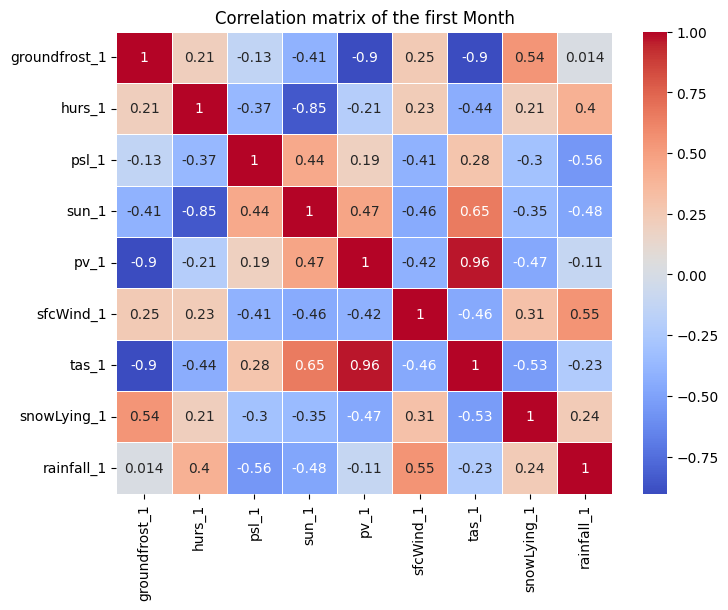

In [ ]:
# Determining the relationship between each variable the values range from -1 to 1 depending on the strength of the relationship
plt.figure(figsize=(8,6))
sns.heatmap(data_1.corr(),annot=True,cmap="coolwarm",linewidths=0.5)
plt.title("Correlation matrix of the first Month")

---

In [ ]:
data_12 = data_dict['data_12']# Data For month 12(Last month)
display(data_12.describe())

,groundfrost_12,hurs_12,psl_12,sun_12,pv_12,sfcWind_12,tas_12,snowLying_12,rainfall_12
count,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000
mean,7.810190,82.481866,1013.644222,121.099494,10.166551,4.634930,9.543113,0.789058,96.063469
std,6.881720,5.460762,5.395496,64.930750,2.685978,1.170502,4.570532,2.028695,67.472499
min,0.008231,63.034928,989.689549,3.492640,5.111736,2.284588,-1.623500,0.000000,0.283924
25%,0.839539,78.809496,1010.728560,65.785644,7.911740,3.832542,5.743825,0.000000,49.695789
50%,6.908302,83.043202,1014.178688,114.747830,9.532201,4.429931,8.984152,0.007580,80.528417
75%,13.425832,86.643390,1017.116940,168.908005,12.486436,5.192540,13.401100,0.430528,123.714835
max,28.015332,93.795462,1028.069039,345.337183,16.764070,11.054694,20.365955,22.167193,697.134520


Text(0.5, 1.0, 'Correlation matrix of the Last Month')

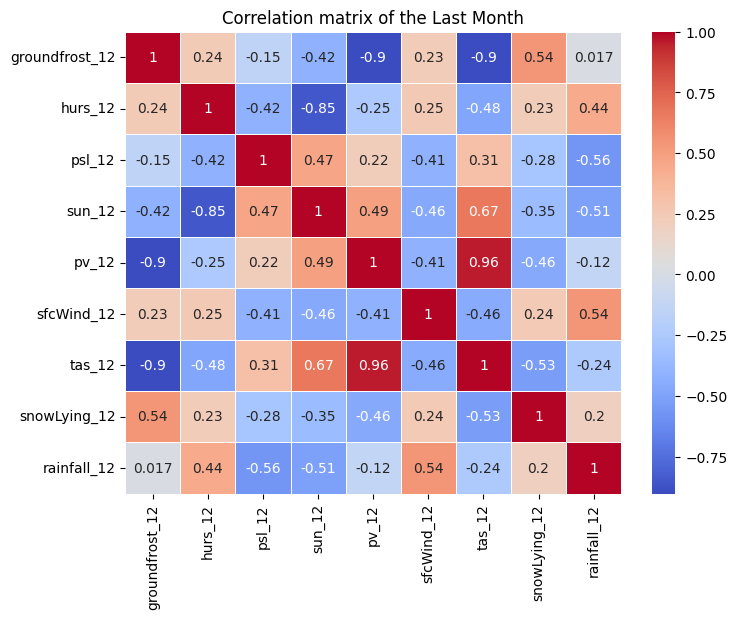

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data_12.corr(),annot=True,cmap="coolwarm",linewidths=0.5)
plt.title("Correlation matrix of the Last Month")

---

### Data Training and Scaling

In [ ]:
X=data_1.drop('hurs_1',axis=1);y=data_1['hurs_1']# Creating the X and y features for the first month
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Traning the data into test data and train data
scaler = StandardScaler()# Scaling the X _train/test data to mean of 0 and standard deviation of 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Shape of the scaled trained data is:",X_train_scaled.shape," with the test data having the shape",X_test_scaled.shape)

Shape of the scaled trained data is: (5304, 8)  with the test data having the shape (1326, 8)


In [ ]:
X12=data_12.drop('hurs_12',axis=1);y12=data_12['hurs_12']# Target Month to predict future month
X_train12, X_test12, y_train12, y_test12 = train_test_split(X12, y12, test_size=0.2, random_state=42)
scaler = StandardScaler()# Same applies for the target month
X_train_scaled12 = scaler.fit_transform(X_train12)
X_test_scaled12 = scaler.transform(X_test12)
print(f"Shape of the scaled trained data is:",X_train_scaled12.shape," with the test data having the shape",X_test_scaled12.shape)

Shape of the scaled trained data is: (5304, 8)  with the test data having the shape (1326, 8)


<h2>Model Development</h2>

In [ ]:
# Reshape the decision data to simulate grayscale image
tmp=np.array(X_train_scaled)# Converting into np the trained scaled data
tmp=tmp.reshape(-1,2,4)
print("Reshaped array size:", tmp.size)
y_train.shape# The tmp should have the same shape as the y_train (5304,.,.,.)

Reshaped array size: 42432


(5304,)

In [ ]:
X=pd.DataFrame(sum(map(list,tmp),[]))
tmp=[]
for i,g in X.groupby(np.arange(len(X))//2):
    tmp.append(g)

tmp=np.array([i.to_numpy() for i in tmp])
X=tmp.reshape(5304, 2, 4, 1)# 5304*2*4*1=The size of the X_train_scaled data

In [ ]:
# defining the keras model
model=Sequential()# groups a linear stack of layers into a `Model`
model.add(Conv2D(32,activation="relu",kernel_size=2,input_shape=(2,4,1)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1))

In [ ]:
model.compile(loss="mean_squared_error",
              optimizer="adam",metrics=["mean_squared_error"])# As the dependent variable is continous will evaluate using the MSE metric

model.fit(X,y_train,epochs=20,batch_size=8)

Epoch 1/20
663/663 [==============================] - 3s 3ms/step - loss: 3508.8254 - mean_squared_error: 3508.8254
Epoch 2/20
663/663 [==============================] - 3s 4ms/step - loss: 31.0028 - mean_squared_error: 31.0028
Epoch 3/20
663/663 [==============================] - 2s 3ms/step - loss: 8.2260 - mean_squared_error: 8.2260
Epoch 4/20
663/663 [==============================] - 2s 3ms/step - loss: 8.0347 - mean_squared_error: 8.0347
Epoch 5/20
663/663 [==============================] - 2s 3ms/step - loss: 7.8729 - mean_squared_error: 7.8729
Epoch 6/20
663/663 [==============================] - 2s 2ms/step - loss: 7.2252 - mean_squared_error: 7.2252
Epoch 7/20
663/663 [==============================] - 2s 3ms/step - loss: 7.0790 - mean_squared_error: 7.0790
Epoch 8/20
663/663 [==============================] - 2s 3ms/step - loss: 6.6356 - mean_squared_error: 6.6356
Epoch 9/20
663/663 [==============================] - 3s 4ms/step - loss: 6.7176 - mean_squared_error: 6.7176
Ep

In [ ]:
loss, mse = model.evaluate(X,y_train)# Model evaluation of the best model
print(f'Loss (Mean Squared Error): {loss}, Mean Squared Error: {mse}')

166/166 [==============================] - 1s 3ms/step - loss: 2.3767 - mean_squared_error: 2.3767
Loss (Mean Squared Error): 2.376697063446045, Mean Squared Error: 2.376697063446045


Here the initial model recorded a 2.299 MSE score we anticipate prior models to have lower scores

In [ ]:
# Generating model predictions
predictions = model.predict(X)
predictions_df = pd.DataFrame(predictions, columns=['Predicted_hurs_1'])
#predictions_df['Predicted_hurs_1'] = predictions_df['Predicted_hurs_1'].apply(lambda x: x / 10)

# Format numbers with commas as thousands separators
predictions_df['Predicted_hurs_1'] = predictions_df['Predicted_hurs_1'].map('{:,.4f}'.format)
predictions_df.to_csv('predictions.csv', index=False)
predictions_df.head()

166/166 [==============================] - 1s 4ms/step


,Predicted_hurs_1
0,78.9453
1,77.3162
2,89.2901
3,90.0009
4,85.3810


In [ ]:
predictions_df.head()

,Predicted_hurs_1
0,78.9453
1,77.3162
2,89.2901
3,90.0009
4,85.3810


************************************************************************************************************

In [ ]:
# Reshape the decision data to simulate grayscale image
tmp=np.array(X_train_scaled12)
tmp=tmp.reshape(-1,2,4)
print("Reshaped array size:", tmp.size)

Reshaped array size: 42432


In [ ]:
X=pd.DataFrame(sum(map(list,tmp),[]))
tmp=[]
for i,g in X.groupby(np.arange(len(X))//2):
    tmp.append(g)

tmp=np.array([i.to_numpy() for i in tmp])
X=tmp.reshape(5304, 2, 4, 1)

In [ ]:
# defining the keras model
model=Sequential()
model.add(Conv2D(32,activation="relu",kernel_size=2,input_shape=(2,4,1)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1))

In [ ]:
model.compile(loss="mean_squared_error",
              optimizer="adam",metrics=["mean_squared_error"])

model.fit(X,y_train12,epochs=20,batch_size=8)

Epoch 1/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5414.9517 - mean_squared_error: 5414.9517
Epoch 2/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 71.7576 - mean_squared_error: 71.7576
Epoch 3/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.6242 - mean_squared_error: 9.6242
Epoch 4/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 8.2791 - mean_squared_error: 8.2791
Epoch 5/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7.8129 - mean_squared_error: 7.8129
Epoch 6/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7.5377 - mean_squared_error: 7.5377
Epoch 7/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7.7929 - mean_squared_error: 7.7929
Epoch 8/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.4380 - mean_squared_error: 7.4380
Epoch 9/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 6.8145 - mean_squared_error: 6.8145
Epoch 10/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7.1847 - mean_squared_error: 7.1847
Epoch 11/20
663/663 ━━━━━━━━━━━

In [ ]:
loss, mse = model.evaluate(X,y_train12)
print(f'Loss (Mean Squared Error): {loss}, Mean Squared Error: {mse}')

166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4925 - mean_squared_error: 2.4925
Loss (Mean Squared Error): 2.552870273590088, Mean Squared Error: 2.5524120330810547


In comparision to the previous model we see a higher MSE score hence proceed to identifying a bettter model from the initial one

In [ ]:
# Generating model predictions
predictions12 = model.predict(X)
predictions_df12 = pd.DataFrame(predictions12, columns=['Predicted_hurs_12'])
predictions_df12.to_csv('predictions12.csv', index=False)
predictions_df12.head()

166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Predicted_hurs_12
0,80.830093
1,78.651855
2,90.524452
3,88.588242
4,75.619110


***************************************************************************************************

<h1>Long Term Short Term Memory (LSTM)</h1>

In [ ]:
X=np.array(X_train_scaled)
X = X.reshape(-1, 2, 4)
X.shape

(5304, 2, 4)

In [ ]:
y_train.shape

(5304,)

In [ ]:
# Developing the LSTM
model=Sequential()
model.add(LSTM(50,
               activation="relu",
         input_shape=(2,4)))
model.add(BatchNormalization())
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(X,y_train,epochs=20,batch_size=8)
loss, mse = model.evaluate(X,y_train)
print(f'Loss (Mean Squared Error): {loss}, Mean Squared Error: {mse}')

# Generating model predictions
lstm_predictions = model.predict(X)
prediction_lstm_decision = pd.DataFrame(lstm_predictions,columns=['Predicted_hurs_1'])
prediction_lstm_decision.to_csv('prediction_lstm_decision.csv', index=False)
prediction_lstm_decision.head()

Epoch 1/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 5924.6382 - mean_squared_error: 5924.6382
Epoch 2/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 619.7706 - mean_squared_error: 619.7706
Epoch 3/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5.7730 - mean_squared_error: 5.7730
Epoch 4/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5.0830 - mean_squared_error: 5.0830
Epoch 5/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.9450 - mean_squared_error: 4.9450
Epoch 6/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 5.1035 - mean_squared_error: 5.1035
Epoch 7/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 5.1065 - mean_squared_error: 5.1065
Epoch 8/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.8939 - mean_squared_error: 4.8939
Epoch 9/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.5005 - mean_squared_error: 4.5005
Epoch 10/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.7050 - mean_squared_error: 4.7050
Epoch 11/20
663/663 ━━━━━━━━━

,Predicted_hurs_1
0,78.437660
1,75.670723
2,86.264870
3,88.826706
4,84.459984


Here we see that the model recorded a 1.6919 MSE score which is lower than the previous models

*******************************************************************************

In [ ]:
X=np.array(X_train_scaled12)
X = X.reshape(-1, 2, 4)
# Developing the LSTM
model=Sequential()
model.add(LSTM(50,
               activation="relu",
         input_shape=(2,4)))
model.add(BatchNormalization())
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(X,y_train12,epochs=20,batch_size=8)
loss, mse = model.evaluate(X,y_train12)
print(f'Loss (Mean Squared Error): {loss}, Mean Squared Error: {mse}')

# Generating model predictions
lstm_predictions = model.predict(X)
prediction_lstm_decision = pd.DataFrame(lstm_predictions,columns=['Predicted_hurs_12'])
prediction_lstm_decision.to_csv('prediction_lstm_decision.csv', index=False)
prediction_lstm_decision.head()

Epoch 1/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5903.1895 - mean_squared_error: 5903.1895
Epoch 2/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 613.1949 - mean_squared_error: 613.1949
Epoch 3/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 6.0825 - mean_squared_error: 6.0825
Epoch 4/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 5.5435 - mean_squared_error: 5.5435
Epoch 5/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.8606 - mean_squared_error: 4.8606
Epoch 6/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.8776 - mean_squared_error: 4.8776
Epoch 7/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.7384 - mean_squared_error: 4.7384
Epoch 8/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5.7261 - mean_squared_error: 5.7261
Epoch 9/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5.4374 - mean_squared_error: 5.4374
Epoch 10/20
663/663 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5.4793 - mean_squared_error: 5.4793
Epoch 11/20
663/663 ━━━━━━━━━

,Predicted_hurs_12
0,79.974922
1,77.349297
2,88.739410
3,88.283234
4,74.406532


Finally the last model recorded a 1.400 MSE value being the champion  model for the analysis recording the least MSE

******************************************************************************************************